In [1]:
import numpy as np
from scipy.special import factorial

import matplotlib.pyplot as plt

### Asymptotic Approximation of $\sum_{i=1}^{n-1}\log^k(i)$

In [2]:
nmin = 10
nmax = 100000
n = 1000
Ns = np.arange(nmin, nmax, n)
k = 3

In [3]:
def signed_stirling1(n, k):
    if k < 0 or k > n: return 0
    if n == 0: return 1 if k == 0 else 0
    
    p = [1]
    for i in range(n):
        new_p = [0] * (len(p) + 1)
        for j in range(len(p)):
            new_p[j+1] += p[j]
            new_p[j] -= i * p[j]
        p = new_p
    return p[k]

def sum_logki(n, k, dtype=np.longdouble):
    logs = np.log(np.arange(1, n, dtype=dtype))
    return np.sum(logs**k)

def sum_logki_approx(n, k, C=0, dtype=np.longdouble):
    n_hp = dtype(n)
    ln_n = np.log(n_hp)
    
    j_vals = np.arange(k + 1)
    coeffs = np.array([factorial(k) // factorial(k - j) for j in j_vals], dtype=dtype)
    powers = ln_n**(k - j_vals)
    signs = np.array([(-1)**j for j in j_vals], dtype=dtype)
    
    s = np.sum(signs * coeffs * powers)
        
    kf = dtype(factorial(k))
    s1_1k = dtype(signed_stirling1(1, k)) 
    s1_3k = dtype(signed_stirling1(3, k))

    result = (n_hp * s) - (ln_n**k / 2.0) + dtype(C) \
             - (s1_1k * kf / 12.0) \
             + (s1_3k * kf / 720.0) \
             + (dtype((-1)**(k+1)) * kf) \
             + (k * ln_n**(k-1) / (12.0 * n_hp))
             
    return result

In [4]:
approx1_ = np.array([sum_logki_approx(i, k, C = 0) for i in Ns])
exact1 = np.array([sum_logki(i, k) for i in Ns])

In [5]:
C = np.mean(np.abs(approx1_ - exact1)[-n//10:])
print(f"C = {C}")

C = 0.0036221163121901404


In [6]:
approx1 = np.array([sum_logki_approx(i, k, C = -C) for i in Ns])

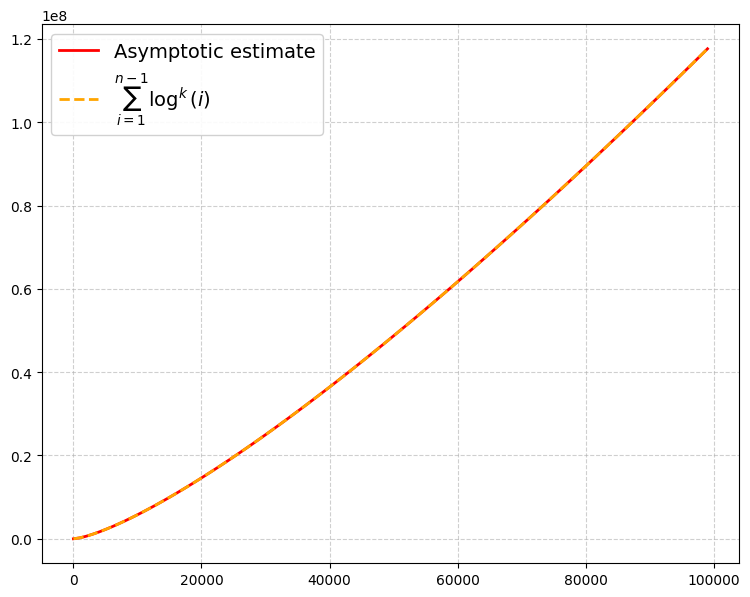

In [7]:
fig, ax = plt.subplots(figsize=(9, 7)) 

ax.plot(Ns, approx1, label='Asymptotic estimate', linestyle='-', color='red', linewidth=2)
ax.plot(Ns, exact1, label=r'$\sum_{i=1}^{n-1}\log^k(i)$', linestyle='--', color='orange', linewidth=2)

ax.legend(fontsize=14, loc='upper left', frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()

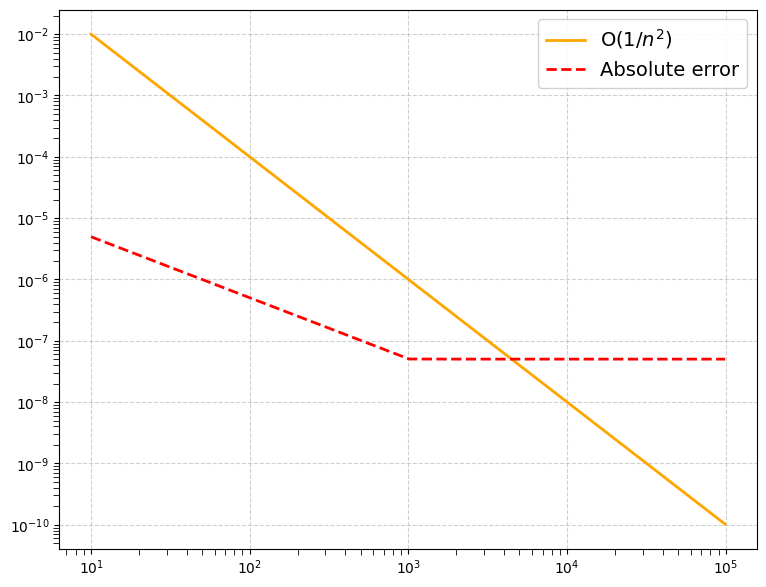

In [8]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(Ns, 1/Ns**2, label=r'$\mathrm{O}(1/n^2)$', linestyle='-', color='orange', linewidth=2)
ax.plot(Ns, np.abs(approx1 - exact1), label='Absolute error', linestyle='--', color='red', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()

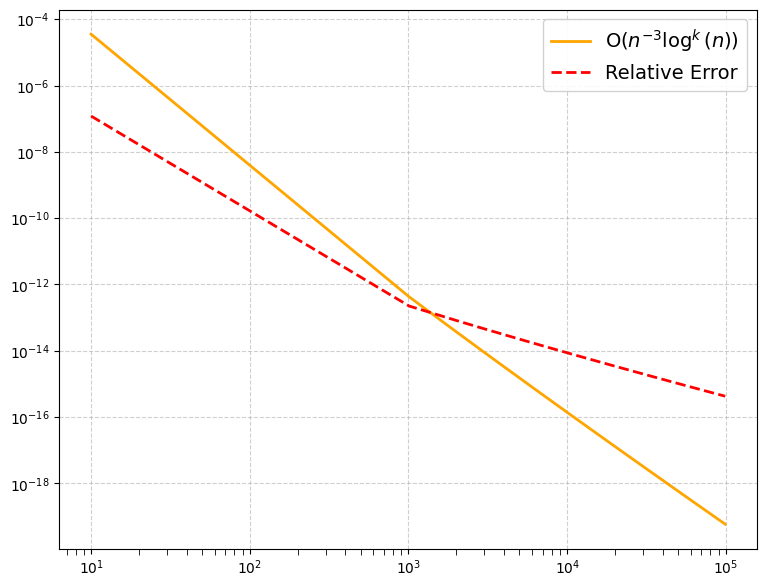

In [9]:
fig, ax = plt.subplots(figsize=(9, 7)) 

ax.plot(Ns, 1/(np.log(Ns)**(k+1) * Ns**3), label=r'$\mathrm{O}(n^{-3}\log^k(n))$', linestyle='-', color='orange', linewidth=2)
ax.plot(Ns, np.abs((approx1 - exact1) / approx1), label='Relative Error', linestyle='--', color='red', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()

### Asymptotic Approximation of $\sum_{i=1}^{n-1}\frac{\log^k(i)}{i}$

In [10]:
GAMMA_1 = -0.0728158454836767248605863758749013191377363383
GAMMA_2 = -0.0096903631928723184845303860352125293590658061
GAMMA_3 = 0.0020538344203033458661600465427533842857158044

In [11]:
nmin = 10
nmax = 100000
n = 1000
Ns = np.arange(nmin, nmax, n)
k = 2

In [12]:
import numpy as np

def sum_logki_i(n, k):
    n_ld = np.longdouble(n)
    k_ld = np.longdouble(k)
    s = np.arange(1, n_ld, dtype=np.longdouble)
    return np.sum(np.divide(np.power(np.log(s), k_ld), s))

def sum_logki_i_approx(n, k, C=0):
    n_ld = np.longdouble(n)
    k_ld = np.longdouble(k)
    C_ld = np.longdouble(C)
    ln_n = np.log(n_ld)

    result = (ln_n**(k_ld + 1) / (k_ld + 1)) + C_ld \
            - (ln_n**k_ld / (2 * n_ld)) \
            - (ln_n**k_ld / (12 * n_ld**2)) \
            + (k_ld * ln_n**(k_ld - 1) / (12 * n_ld**2))

    return result

In [13]:
approx2_ = np.array([sum_logki_i_approx(i, k, C = 0) for i in Ns])
exact2 = np.array([sum_logki_i(i, k) for i in Ns])

In [14]:
C = np.mean(np.abs(approx2_ - exact2)[-n//10:])
print(f"C = {C}")

C = 0.009690372643006293


In [15]:
approx2 = np.array([sum_logki_i_approx(i, k, C = GAMMA_2) for i in Ns])

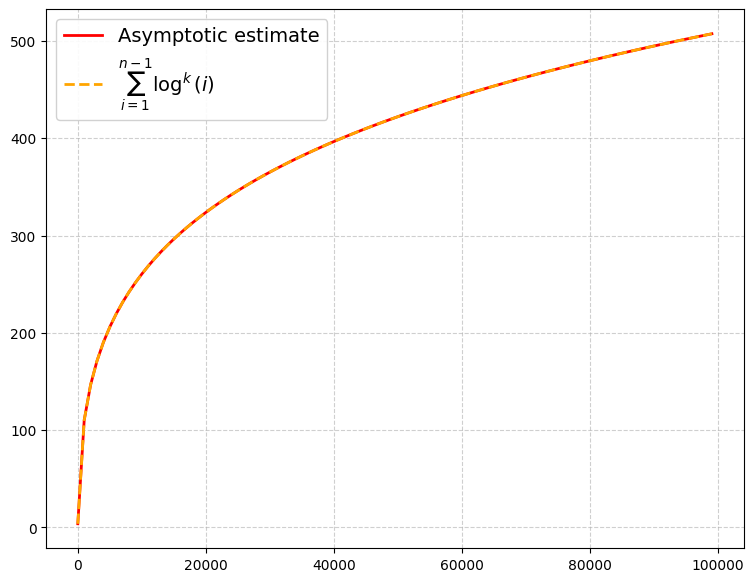

In [16]:
fig, ax = plt.subplots(figsize=(9, 7)) 

ax.plot(Ns, approx2, label='Asymptotic estimate', linestyle='-', color='red', linewidth=2)
ax.plot(Ns, exact2, label=r'$\sum_{i=1}^{n-1}\log^k(i)$', linestyle='--', color='orange', linewidth=2)

ax.legend(fontsize=14, loc='upper left', frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()

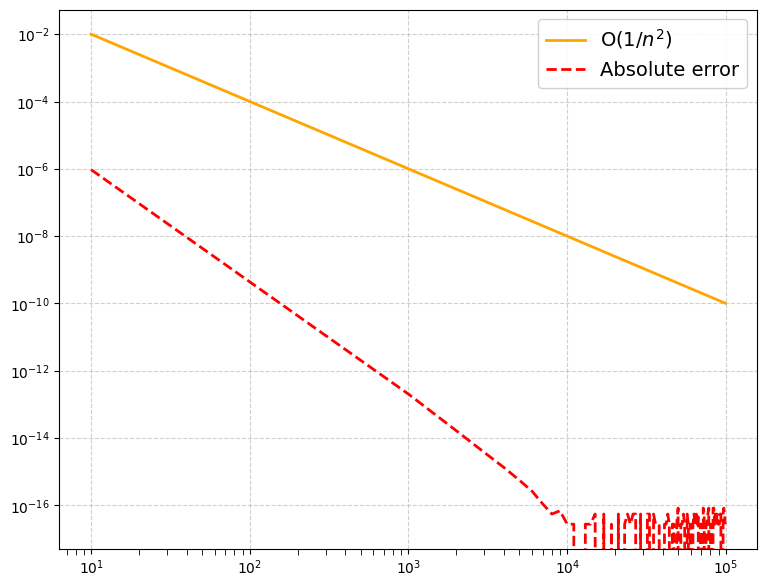

In [17]:
fig, ax = plt.subplots(figsize=(9, 7))

ax.plot(Ns, 1/Ns**2, label=r'$\mathrm{O}(1/n^2)$', linestyle='-', color='orange', linewidth=2)
ax.plot(Ns, np.abs(approx2 - exact2), label='Absolute error', linestyle='--', color='red', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()

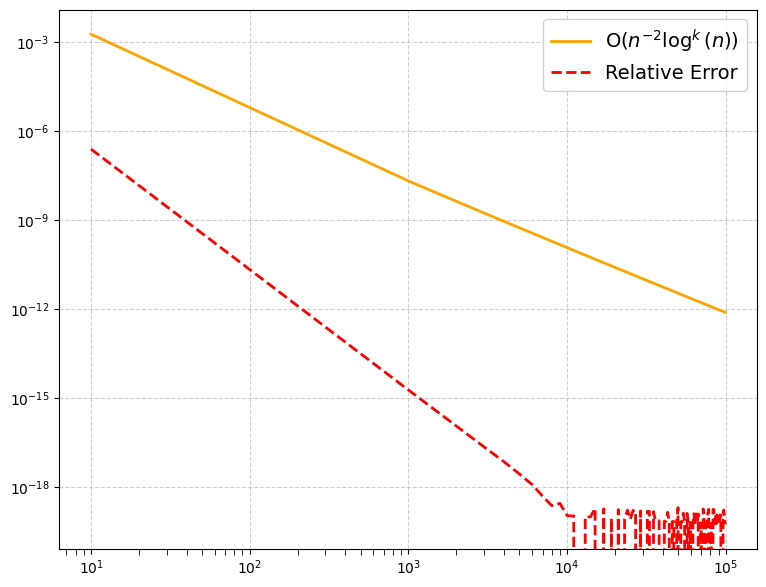

In [18]:
fig, ax = plt.subplots(figsize=(9, 7)) 

ax.plot(Ns, 1/(np.log(Ns)**k * Ns**2), label=r'$\mathrm{O}(n^{-2}\log^k(n))$', linestyle='-', color='orange', linewidth=2)
ax.plot(Ns, np.abs((approx2 - exact2) / approx2), label='Relative Error', linestyle='--', color='red', linewidth=2)

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(fontsize=14, frameon=True, framealpha=0.9)
ax.grid(visible=True, linestyle='--', alpha=0.6)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', length=4)

plt.show()